In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('./DataSets/Fuel-Consumption-Analysis/measurements.csv')
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


We need to change dtype of object into float64 or int64.

In [4]:
# Changing dtype of distance, consume, temp_inside
df['distance']     = df['distance'].str.replace(',', '').astype(float) #.astype(int)
df['consume']      = df['consume'].str.replace(',', '').astype(float)
df['temp_inside']  = df['temp_inside'].str.replace(',', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     object 
 11  refill gas     13 non-null     object 
dtypes: float64(3), int64(5), object(4)
memory usage: 36.5+ KB


<AxesSubplot:>

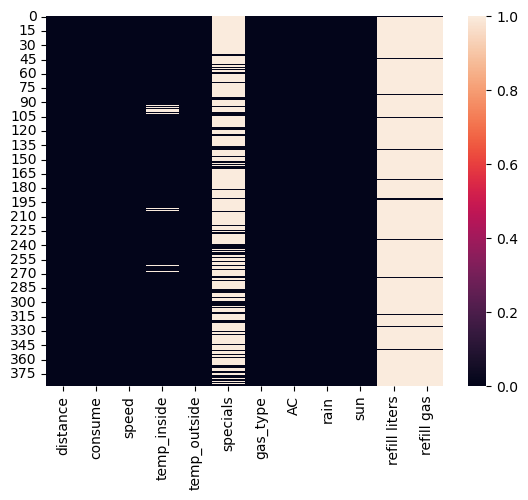

In [5]:
sns.heatmap(data=df.isnull())

We can see the missing values in following features:

1. specials

2. refill liters

3. refill gas

In [6]:
#dropping some of the features 
df=df.drop(['specials','refill liters','refill gas'],axis=1)
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,215.0,12,E10,0,0,0
1,12.0,42.0,30,215.0,13,E10,0,0,0
2,112.0,55.0,38,215.0,15,E10,0,0,0
3,129.0,39.0,36,215.0,14,E10,0,0,0
4,185.0,45.0,46,215.0,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,37.0,39,245.0,18,SP98,0,0,0
384,161.0,43.0,38,25.0,31,SP98,1,0,0
385,16.0,38.0,45,25.0,19,SP98,0,0,0
386,154.0,46.0,42,25.0,31,SP98,1,0,0


<AxesSubplot:>

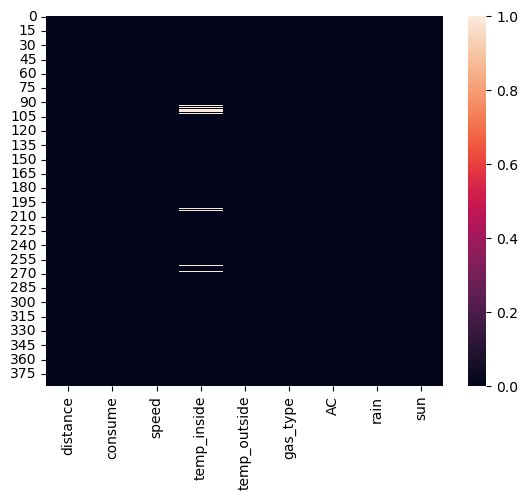

In [7]:
sns.heatmap(data=df.isnull())

In [8]:
df['temp_inside'].describe()

count    376.000000
mean     130.563830
std       98.461532
min       19.000000
25%       22.000000
50%      215.000000
75%      215.000000
max      255.000000
Name: temp_inside, dtype: float64

In [9]:
df['temp_inside']=df['temp_inside'].fillna(21.92)

In [10]:
data=df.isnull().sum()
data

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

No missing values

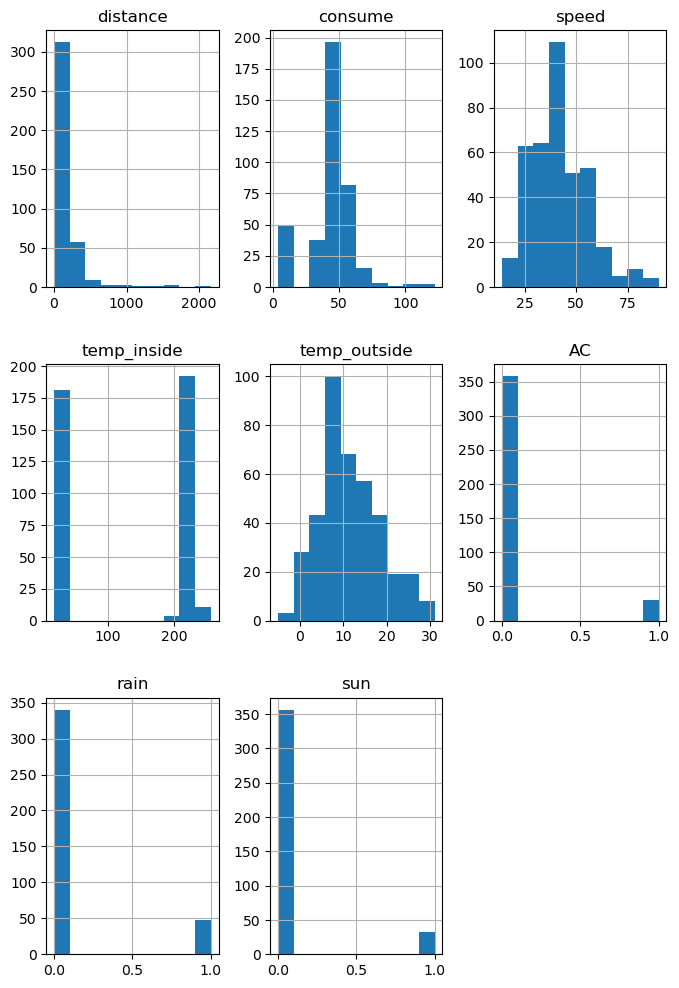

In [11]:
df.hist(figsize=(8,12))
plt.show()

In [12]:
df['distance'].describe()

count     388.000000
mean      172.891753
std       211.910501
min         2.000000
25%        86.000000
50%       124.000000
75%       184.000000
max      2161.000000
Name: distance, dtype: float64

In [13]:
#MIN. AND MAX. FUEL CONSUMPTION OF TRAVELLED DISTANCE :-
consmin=df.query('distance==1.300000')
consmin

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


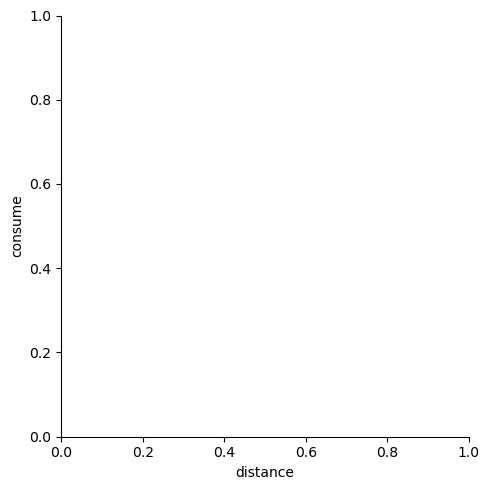

In [14]:
sns.lmplot('distance','consume',consmin)
plt.show()

In [15]:
consmax=df.query('distance==216.100000')
consmax 

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


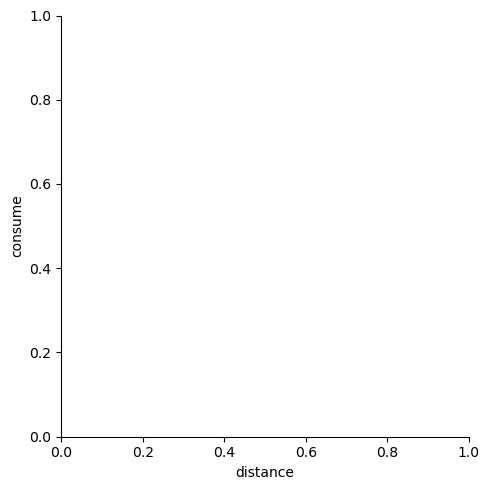

In [16]:
sns.lmplot('distance','consume',consmax)
plt.show()

In [17]:
df['speed'].describe()

count    388.000000
mean      41.927835
std       13.598524
min       14.000000
25%       32.750000
50%       40.500000
75%       50.000000
max       90.000000
Name: speed, dtype: float64

In [18]:
consmin=df.query('speed==14.000000')
consmin 

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
147,17.0,108.0,14,215.0,10,E10,0,1,0


In [19]:
consmax=df.query('speed==90.000000')
consmax 

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
319,2161.0,53.0,90,22.0,21,SP98,0,0,1


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


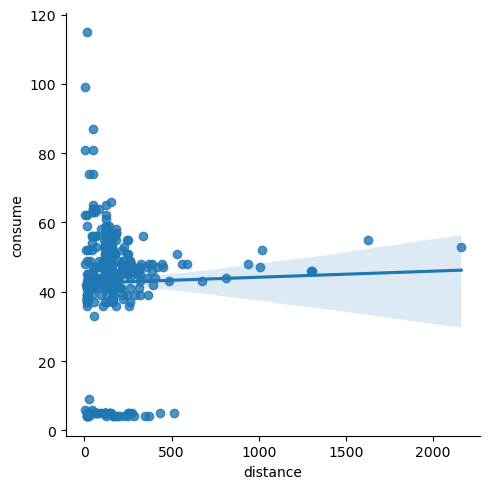

In [20]:
minrn=df.query('rain==0.000000')
minrn

sns.lmplot('distance','consume',data=minrn)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


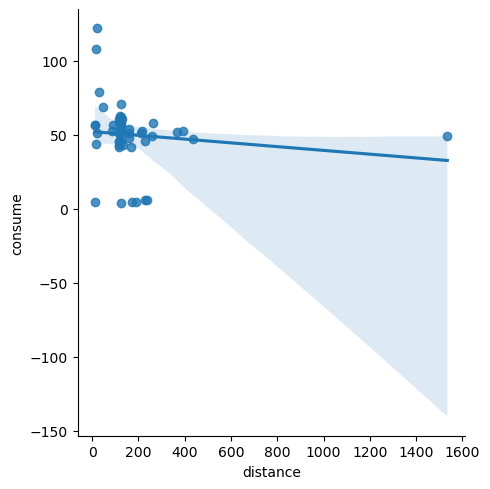

In [21]:
maxrn=df.query('rain==1.000000')
maxrn

sns.lmplot('distance','consume',data=maxrn)
plt.show()

THE DIFFERENT GAS TYPE USED BY USER:-

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


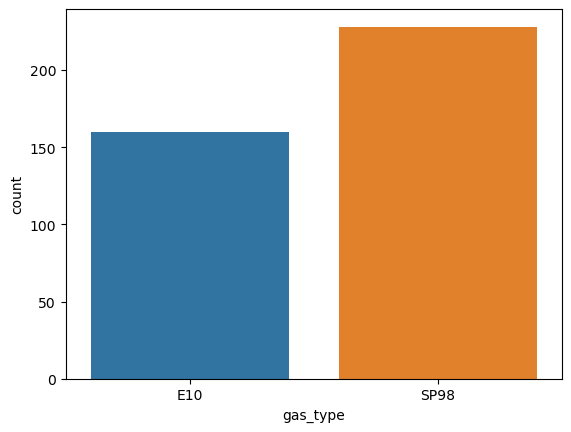

In [22]:
sns.countplot(df['gas_type'])
plt.show()

Changing dtype of gas_type from object to int using LabelEncoder

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gas_type']=le.fit_transform(df['gas_type'])

In [24]:
df['distance']=df['distance'].astype(int)
df['consume']=df['consume'].astype(int)
df['temp_inside']=df['temp_inside'].astype(int)
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,215,12,0,0,0,0
1,12,42,30,215,13,0,0,0,0
2,112,55,38,215,15,0,0,0,0
3,129,39,36,215,14,0,0,0,0
4,185,45,46,215,15,0,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16,37,39,245,18,1,0,0,0
384,161,43,38,25,31,1,1,0,0
385,16,38,45,25,19,1,0,0,0
386,154,46,42,25,31,1,1,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   distance      388 non-null    int32
 1   consume       388 non-null    int32
 2   speed         388 non-null    int64
 3   temp_inside   388 non-null    int32
 4   temp_outside  388 non-null    int64
 5   gas_type      388 non-null    int32
 6   AC            388 non-null    int64
 7   rain          388 non-null    int64
 8   sun           388 non-null    int64
dtypes: int32(4), int64(5)
memory usage: 21.3 KB


Dropping consume from x and adding to y

In [26]:
x=df.drop('consume',axis=1)
y=df.iloc[:,1]
y

0       5
1      42
2      55
3      39
4      45
       ..
383    37
384    43
385    38
386    46
387     5
Name: consume, Length: 388, dtype: int32

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [29]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_trainmn=mms.fit_transform(x_train)
x_testmn=mms.transform(x_test)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_trainstd=ss.fit_transform(x_train)
x_teststd=ss.transform(x_test)
from sklearn.decomposition import PCA
pc=PCA(n_components=5)
x_trainpca=pc.fit_transform(x_train)
x_testpca=pc.transform(x_test)

In [30]:
models = {
    "Linear Regression": LinearRegression(fit_intercept=True),
    "KNN": KNeighborsClassifier(),
    "SVM" :SVC(),
    "Naive Bayes": GaussianNB(),
    "Decisiontree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(max_features='sqrt', random_state=5),
    "LogisticRegression": LogisticRegression()
}

for model in models.items():
    m = model[1]
    m.fit(x_train, y_train)
    print(model[0])
    print("Score: ", m.score(x_test,y_test))
    print("")

Linear Regression
Score:  -0.02775096116939757

KNN
Score:  0.07692307692307693

SVM
Score:  0.07692307692307693

Naive Bayes
Score:  0.02564102564102564

Decisiontree
Score:  0.038461538461538464

RandomForest


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Score:  0.08974358974358974

LogisticRegression
Score:  0.05128205128205128



C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression is giving the best accuracy out of all others algorithm

In [31]:
#Checking test value using Logistic Regression 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
lnr3=LogisticRegression()
lnr3.fit(x_trainpca,y_train)
pd3=lnr3.predict(x_testpca)
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pd3)))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, pd3))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, pd3))

Root Mean Squared Error(RMSE): 29.83630553880839
Mean Absolute Error(MAE): 20.923076923076923
Mean Squared Error(MSE): 890.2051282051282


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


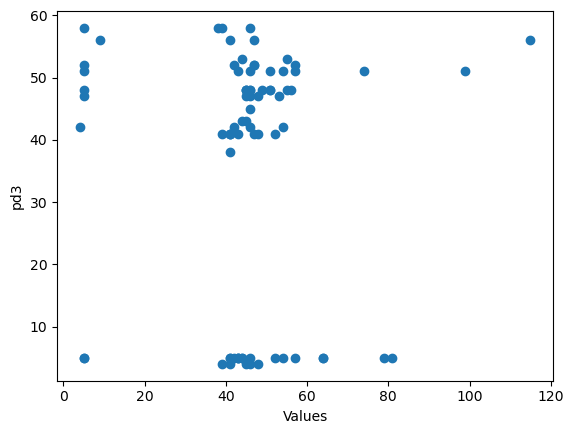

In [32]:
plt.scatter(y_test,pd3)
plt.xlabel('Values')
plt.ylabel('pd3')
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


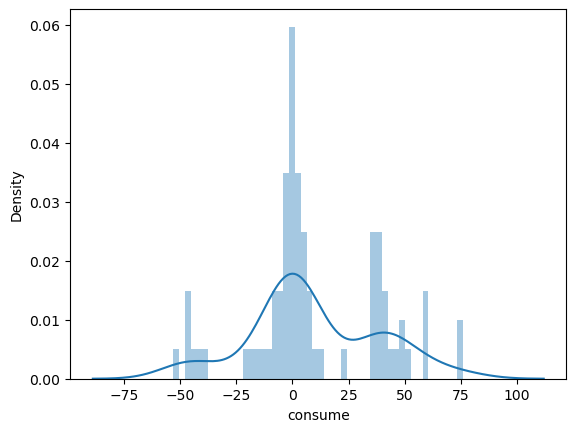

In [33]:
sns.distplot((y_test-pd3),bins=50)
plt.show()